## Confronto su metodi per definire la baseline e per definire l'intervallo d'integrazione

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import mean

In [5]:
def read_file(filename , samples = 1024 ):
    data = np.fromfile(filename,  dtype=np.int16)
    n = len(data)/samples
    data = np.array(np.array_split(np.array(data),n))
    return data

dataLED=read_file(filename= '/data/abalone/ABALONE_RampingUp/2021_09_13_T1206_ABALONE_20kV_SiPM2_32V_LED300V.dat' , samples = 1024)

n=len(dataLED)
#print("Il numero degli eventi è ", n)

nn=len(dataLED[0]) #nn=1024 è il numero di campioni ognuno preso in un intervallo di 10ns
#print('Il numero di campioni è', nn, 'ognuno preso in un intervallo di 10ns')

inf=int(nn/2)-10  #limite inferiore dell'intervallo in cui voglio cercare il max
sup=int(nn/2)+60  #limite superiore dell'intervallo in cui voglio cercare il max
#print("L'intervallo in cui cerco il max è [", inf, ",", sup,"]" )


In [7]:
AREA0_2, AREA0_4, AREAP40_2, AREAP40_4, AREA100_2, AREA100_4, AREAP100_2, AREAP100_4 = [], [], [], [], [], [], [], []

for i in range(n):
    wf=(dataLED[i])*(-1)
    
    max_pos=inf+np.where(wf[inf:sup]==np.max(wf[inf:sup]))[0][0]  #cerco il max nell'intervallo [inf,sup] definito all'inizio
    
    p=max_pos-20
    blp40=np.mean(dataLED[i][p-40:p]) 
    stdp40=np.std(dataLED[i][p-40:p])
    
    wfp40=(dataLED[i]-blp40)*(-1)
    
    maxp40=wfp40[max_pos]   #valore della wf nel massimo
    
    
    try:
        if maxp40>3*stdp40 :
            idx1= np.where(wfp40[0:max_pos]<3*stdp40)[0][-1]
            
        else:
            idx1= np.where(wfp40[0:max_pos]<0)[0][-1]
                        
    except:
        print("Per wf_",i,"non è possibile determinare l'estremo a dell'integrale")
           
    if maxp40>3*stdp40 :
        try:
            idx2= max_pos+np.where(wfp40[max_pos:nn]<3*stdp40)[0][0]
            
        except:
            print('_') #f"Per wf_{i} non è possibile determinare l'estremo b dell'integrale")
    else:
        try:
            idx2= max_pos+np.where(wfp40[max_pos:nn]<0)[0][0]
            
        except:
            print('_') #f"Per wf_{i} non è possibile determinare l'estremo b dell'integrale")
        
    ap40_2=idx1-2
    bp40_2=idx2+2
    areap40_2=np.sum(wfp40[ap40_2:bp40_2])
    
    ap40_4=idx1-4
    bp40_4=idx2+4
    areap40_4=np.sum(wfp40[ap40_4:bp40_4])
    
    bl0=np.mean(dataLED[i][:40]) 
    std0=np.std(dataLED[i][:40])
    
    wf0=(dataLED[i]-bl0)*(-1)
    
    max0=wf0[max_pos]   #valore della wf nel massimo
    
    
    try:
        if max0>3*std0 :
            idx1= np.where(wf0[0:max_pos]<3*std0)[0][-1]
            
        else:
            idx1= np.where(wf0[0:max_pos]<0)[0][-1]
                        
    except:
        print('_') #"Per wf_",i,"non è possibile determinare l'estremo a dell'integrale")
           
    if max0>3*std0 :
        try:
            idx2= max_pos+np.where(wf0[max_pos:nn]<3*std0)[0][0]
            
        except:
            print('_') #f"Per wf_{i} non è possibile determinare l'estremo b dell'integrale")
    else:
        try:
            idx2= max_pos+np.where(wf0[max_pos:nn]<0)[0][0]
            
        except:
            print('_') #f"Per wf_{i} non è possibile determinare l'estremo b dell'integrale")
        
    a0_2=idx1-2
    b0_2=idx2+2
    area0_2=np.sum(wf0[a0_2:b0_2])
    
    a0_4=idx1-4
    b0_4=idx2+4
    area0_4=np.sum(wf0[a0_4:b0_4])
    
    bl100=np.mean(dataLED[i][:100]) 
    std100=np.std(dataLED[i][:100])
    
    wf100=(dataLED[i]-bl100)*(-1)
    
    max100=wf100[max_pos]   #valore della wf nel massimo
    
    
    try:
        if max100>3*std0 :
            idx1= np.where(wf100[0:max_pos]<3*std100)[0][-1]
            
        else:
            idx1= np.where(wf100[0:max_pos]<0)[0][-1]
                        
    except:
        print('_') #"Per wf_",i,"non è possibile determinare l'estremo a dell'integrale")
           
    if max100>3*std100 :
        try:
            idx2= max_pos+np.where(wf100[max_pos:nn]<3*std100)[0][0]
            
        except:
            print('_') #f"Per wf_{i} non è possibile determinare l'estremo b dell'integrale")
    else:
        try:
            idx2= max_pos+np.where(wf100[max_pos:nn]<0)[0][0]
            
        except:
            print('_') #f"Per wf_{i} non è possibile determinare l'estremo b dell'integrale")
        
    a100_2=idx1-2
    b100_2=idx2+2
    area100_2=np.sum(wf100[a100_2:b100_2])
    
    a100_4=idx1-4
    b100_4=idx2+4
    area100_4=np.sum(wf100[a100_4:b100_4])
    
    
    blp100=np.mean(dataLED[i][p-100:p]) 
    stdp100=np.std(dataLED[i][p-100:p])
    
    wfp100=(dataLED[i]-blp100)*(-1)
    
    maxp100=wfp100[max_pos]   #valore della wf nel massimo
    
    
    try:
        if maxp100>3*stdp100 :
            idx1= np.where(wfp100[0:max_pos]<3*stdp100)[0][-1]
            
        else:
            idx1= np.where(wfp100[0:max_pos]<0)[0][-1]
                        
    except:
        print('_') #"Per wf_",i,"non è possibile determinare l'estremo a dell'integrale")
           
    if maxp100>3*stdp100 :
        try:
            idx2= max_pos+np.where(wfp100[max_pos:nn]<3*stdp100)[0][0]
            
        except:
            print('_') #f"Per wf_{i} non è possibile determinare l'estremo b dell'integrale")
    else:
        try:
            idx2= max_pos+np.where(wfp100[max_pos:nn]<0)[0][0]
            
        except:
            print('_') #f"Per wf_{i} non è possibile determinare l'estremo b dell'integrale")
        
    ap100_2=idx1-2
    bp100_2=idx2+2
    areap100_2=np.sum(wfp100[ap100_2:bp100_2])
    
    ap100_4=idx1-4
    bp100_4=idx2+4
    areap100_4=np.sum(wfp100[ap100_4:bp100_4])
    
    
    AREAP40_2.append(areap40_2)
    AREA0_2.append(area0_2)
    AREAP100_2.append(areap100_2)
    AREA100_2.append(area100_2)
    
    AREAP40_4.append(areap40_4)
    AREA0_4.append(area0_4)
    AREAP100_4.append(areap100_4)
    AREA100_4.append(area100_4)
    
    
data = pd.DataFrame(columns=['areap40_2', 'area0_2','area100_2', 'areap100_2', 'areap40_4', 'area0_4','area100_4', 'areap100_4'])
data['area0_2'] = AREA0_2
data['areap40_2'] = AREAP40_2
data['area100_2'] = AREA100_2
data['areap100_2'] = AREAP100_2
data['area0_4'] = AREA0_4
data['areap40_4'] = AREAP40_4
data['area100_4'] = AREA100_4
data['areap100_4'] = AREAP100_4


data.to_hdf('data_ABALONE_aree_INTERVALLI.h5', key='df', mode='w')

_
_
_
_
_
_
_
_
_
_
_
_


## Confronto fissando la definizione della baseline e variando l'intervallo d'integrazione

Abbiamo definito il punto appena prima del massimo in cui la wf scende al di sotto di 3std come **idx1** e quello appena dopo il massimo in cui di nuovo scende sotto i 3std come **idx2**.

Per calcolare l'area abbiamo considerato un intervallo **[a2,b2]** dove a2=idx1-2 e b2=idx2+2 **oppure** un intervallo **[a4,b4]** dove a4=idx1-4 e b4=idx2+4.

Di seguito per ogni definizione della baseline consideriamo i due casi:

### Baseline calcolata sui primi 40 campioni

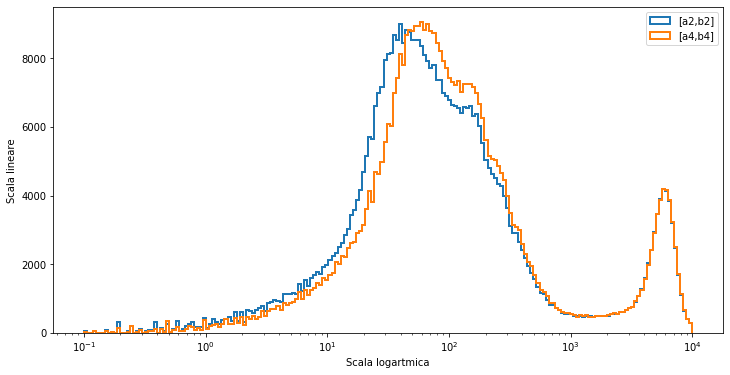

In [8]:
area_space = np.logspace(-1,4,200)  #partendo da 10^(-1) fino a 10^4 con 200bins
plt.figure(figsize=(12,6))
plt.hist(data['area0_2'],bins=area_space,histtype='step',lw=2,density=False, label='[a2,b2]')
plt.hist(data['area0_4'],bins=area_space,histtype='step',lw=2,density=False, label='[a4,b4]')
plt.ylabel('Scala lineare')
plt.xlabel('Scala logartmica')
plt.xscale('log')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

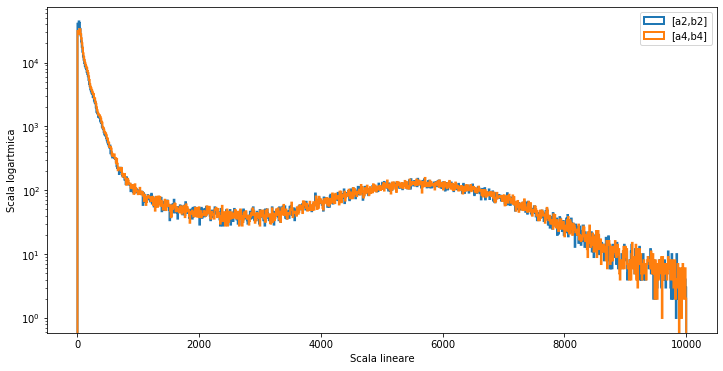

In [9]:
area_space = np.linspace(0,10000,1000)
plt.figure(figsize=(12,6))
plt.hist(data['area0_2'],bins=area_space,histtype='step',lw=2,density=False, label='[a2,b2]')
plt.hist(data['area0_4'],bins=area_space,histtype='step',lw=2,density=False, label='[a4,b4]')
plt.yscale("log")
plt.xlabel('Scala lineare')
plt.ylabel('Scala logartmica')
plt.legend()
plt.show

### Baseline calcolata su un intervallo di 40 campioni poco prima del massimo

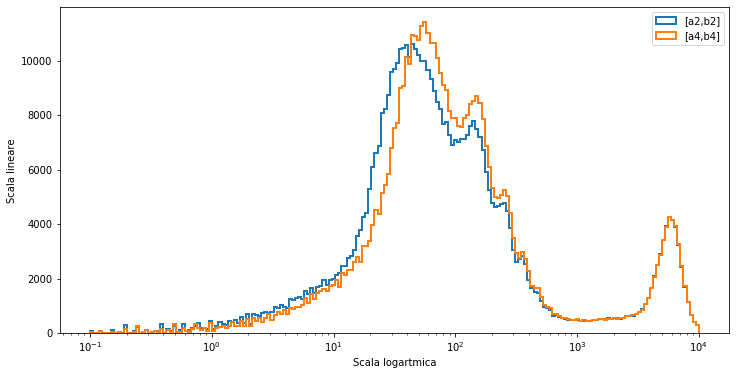

In [10]:
area_space = np.logspace(-1,4,200)  #partendo da 10^(-1) fino a 10^4 con 200bins
plt.figure(figsize=(12,6))
plt.hist(data['areap40_2'],bins=area_space,histtype='step',lw=2,density=False, label='[a2,b2]')
plt.hist(data['areap40_4'],bins=area_space,histtype='step',lw=2,density=False, label='[a4,b4]')
plt.ylabel('Scala lineare')
plt.xlabel('Scala logartmica')
plt.xscale('log')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

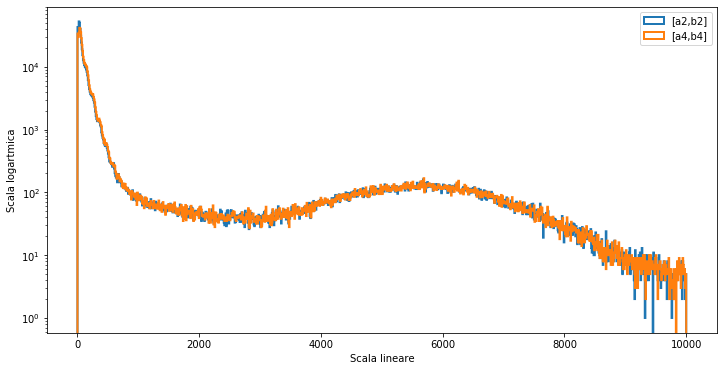

In [11]:
area_space = np.linspace(0,10000,1000)
plt.figure(figsize=(12,6))
plt.hist(data['areap40_2'],bins=area_space,histtype='step',lw=2,density=False, label='[a2,b2]')
plt.hist(data['areap40_4'],bins=area_space,histtype='step',lw=2,density=False, label='[a4,b4]')
plt.yscale("log")
plt.xlabel('Scala lineare')
plt.ylabel('Scala logartmica')
plt.legend()
plt.show

### Baseline calcolata sui primi 100 campioni

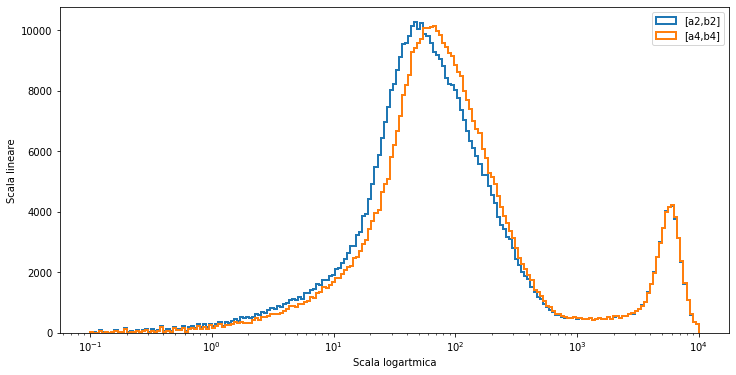

In [12]:
area_space = np.logspace(-1,4,200)  #partendo da 10^(-1) fino a 10^4 con 200bins
plt.figure(figsize=(12,6))
plt.hist(data['area100_2'],bins=area_space,histtype='step',lw=2,density=False, label='[a2,b2]')
plt.hist(data['area100_4'],bins=area_space,histtype='step',lw=2,density=False, label='[a4,b4]')
plt.ylabel('Scala lineare')
plt.xlabel('Scala logartmica')
plt.xscale('log')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

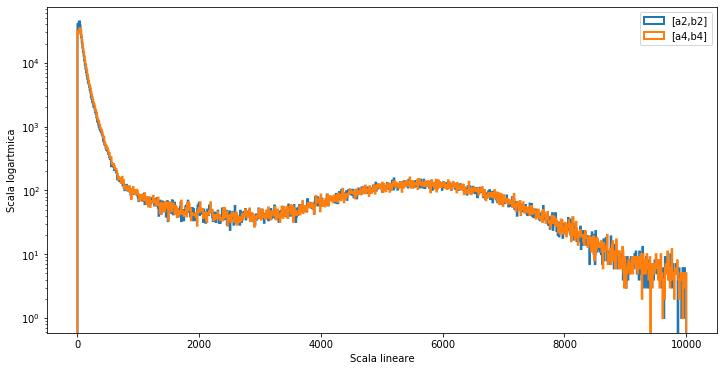

In [13]:
area_space = np.linspace(0,10000,1000)
plt.figure(figsize=(12,6))
plt.hist(data['area100_2'],bins=area_space,histtype='step',lw=2,density=False, label='[a2,b2]')
plt.hist(data['area100_4'],bins=area_space,histtype='step',lw=2,density=False, label='[a4,b4]')
plt.yscale("log")
plt.xlabel('Scala lineare')
plt.ylabel('Scala logartmica')
plt.legend()
plt.show

### Baseline calcolata su un intervallo di 100 campioni poco prima del massimo

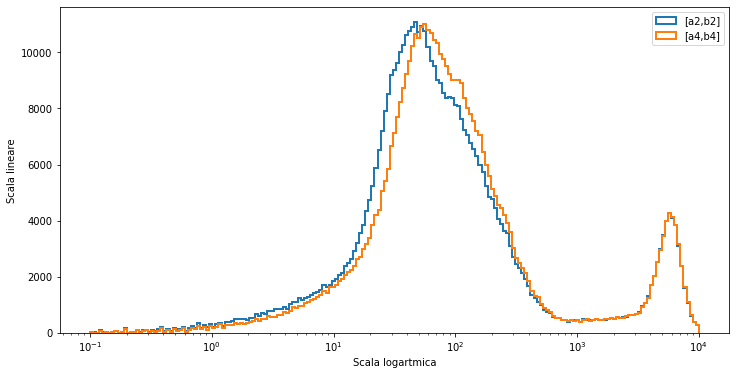

In [14]:
area_space = np.logspace(-1,4,200)  #partendo da 10^(-1) fino a 10^4 con 200bins
plt.figure(figsize=(12,6))
plt.hist(data['areap100_2'],bins=area_space,histtype='step',lw=2,density=False, label='[a2,b2]')
plt.hist(data['areap100_4'],bins=area_space,histtype='step',lw=2,density=False, label='[a4,b4]')
plt.ylabel('Scala lineare')
plt.xlabel('Scala logartmica')
plt.xscale('log')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

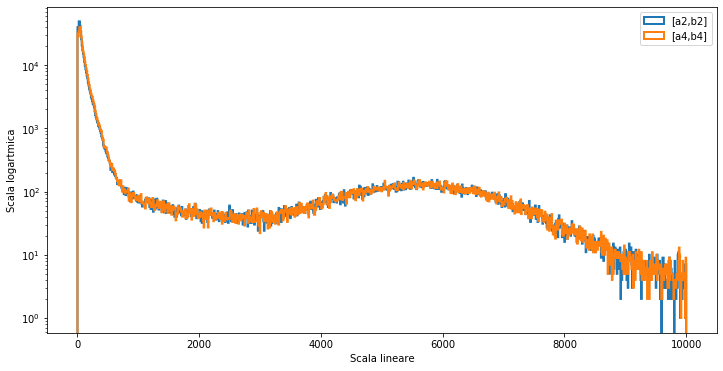

In [15]:
area_space = np.linspace(0,10000,1000)
plt.figure(figsize=(12,6))
plt.hist(data['areap100_2'],bins=area_space,histtype='step',lw=2,density=False, label='[a2,b2]')
plt.hist(data['areap100_4'],bins=area_space,histtype='step',lw=2,density=False, label='[a4,b4]')
plt.yscale("log")
plt.xlabel('Scala lineare')
plt.ylabel('Scala logartmica')
plt.legend()
plt.show

## Confronto tra definizioni di baseline fissando l'intervallo d'integrazione

### Intervallo fissato a [a2,b2]

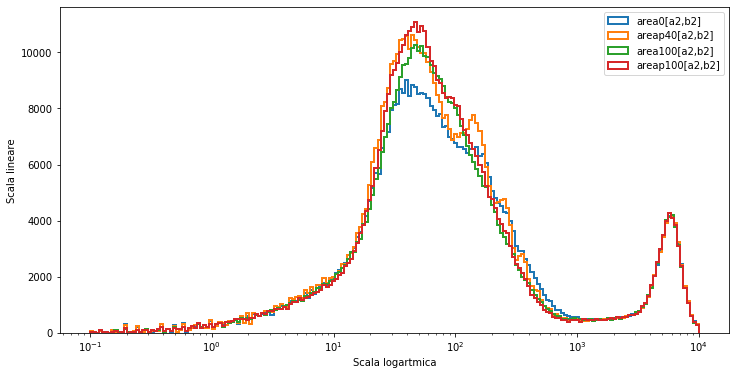

In [18]:
area_space = np.logspace(-1,4,200)  #partendo da 10^(-1) fino a 10^4 con 200bins

plt.figure(figsize=(12,6))

plt.hist(data['area0_2'],bins=area_space,histtype='step',lw=2,density=False, label='area0[a2,b2]')

plt.hist(data['areap40_2'],bins=area_space,histtype='step',lw=2,density=False, label='areap40[a2,b2]')

plt.hist(data['area100_2'],bins=area_space,histtype='step',lw=2,density=False, label='area100[a2,b2]')

plt.hist(data['areap100_2'],bins=area_space,histtype='step',lw=2,density=False, label='areap100[a2,b2]')

plt.ylabel('Scala lineare')
plt.xlabel('Scala logartmica')
plt.xscale('log')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

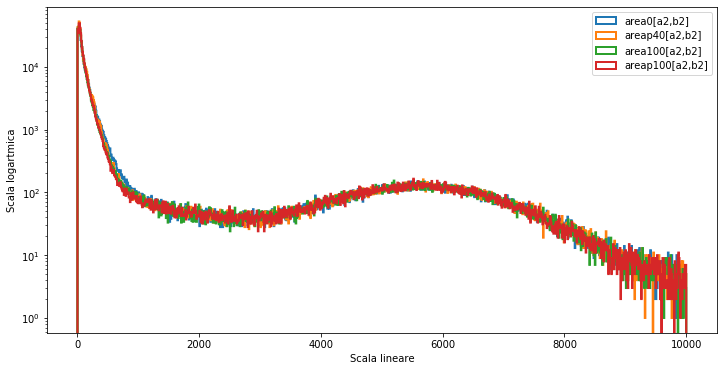

In [20]:
area_space = np.linspace(0,10000,1000)

plt.figure(figsize=(12,6))

plt.hist(data['area0_2'],bins=area_space,histtype='step',lw=2,density=False, label='area0[a2,b2]')

plt.hist(data['areap40_2'],bins=area_space,histtype='step',lw=2,density=False, label='areap40[a2,b2]')

plt.hist(data['area100_2'],bins=area_space,histtype='step',lw=2,density=False, label='area100[a2,b2]')

plt.hist(data['areap100_2'],bins=area_space,histtype='step',lw=2,density=False, label='areap100[a2,b2]')

plt.yscale("log")
plt.xlabel('Scala lineare')
plt.ylabel('Scala logartmica')
plt.legend()
plt.show

### Intervallo fissato a [a4,b4]

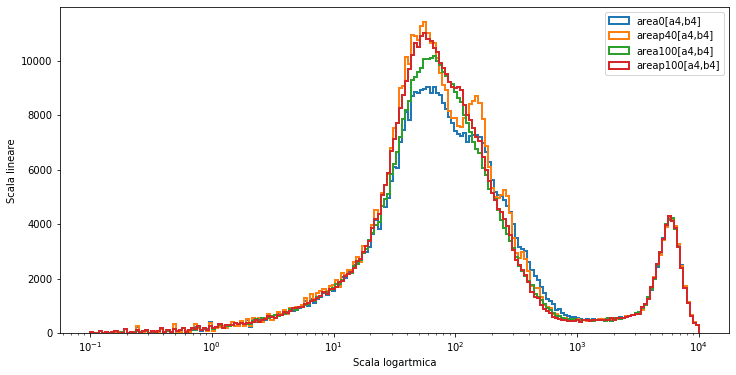

In [19]:
area_space = np.logspace(-1,4,200)  #partendo da 10^(-1) fino a 10^4 con 200bins

plt.figure(figsize=(12,6))

plt.hist(data['area0_4'],bins=area_space,histtype='step',lw=2,density=False, label='area0[a4,b4]')

plt.hist(data['areap40_4'],bins=area_space,histtype='step',lw=2,density=False, label='areap40[a4,b4]')

plt.hist(data['area100_4'],bins=area_space,histtype='step',lw=2,density=False, label='area100[a4,b4]')

plt.hist(data['areap100_4'],bins=area_space,histtype='step',lw=2,density=False, label='areap100[a4,b4]')

plt.ylabel('Scala lineare')
plt.xlabel('Scala logartmica')
plt.xscale('log')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

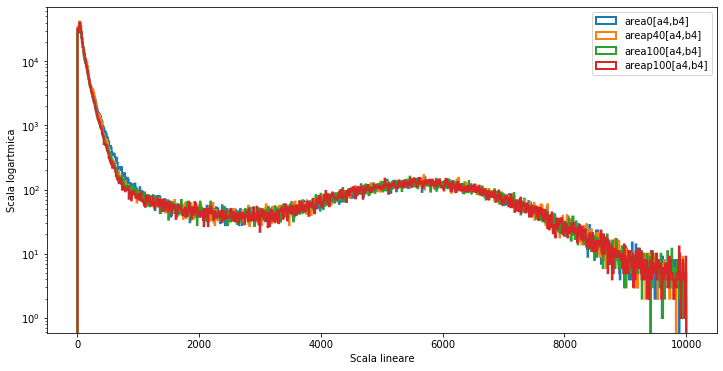

In [21]:
area_space = np.linspace(0,10000,1000)

plt.figure(figsize=(12,6))

plt.hist(data['area0_4'],bins=area_space,histtype='step',lw=2,density=False, label='area0[a4,b4]')

plt.hist(data['areap40_4'],bins=area_space,histtype='step',lw=2,density=False, label='areap40[a4,b4]')

plt.hist(data['area100_4'],bins=area_space,histtype='step',lw=2,density=False, label='area100[a4,b4]')

plt.hist(data['areap100_4'],bins=area_space,histtype='step',lw=2,density=False, label='areap100[a4,b4]')

plt.yscale("log")
plt.xlabel('Scala lineare')
plt.ylabel('Scala logartmica')
plt.legend()
plt.show

# Unendo tutti i  grafici

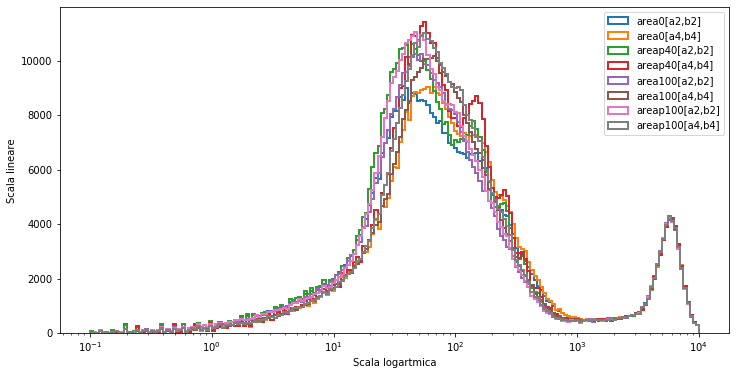

In [16]:
area_space = np.logspace(-1,4,200)  #partendo da 10^(-1) fino a 10^4 con 200bins

plt.figure(figsize=(12,6))

plt.hist(data['area0_2'],bins=area_space,histtype='step',lw=2,density=False, label='area0[a2,b2]')
plt.hist(data['area0_4'],bins=area_space,histtype='step',lw=2,density=False, label='area0[a4,b4]')

plt.hist(data['areap40_2'],bins=area_space,histtype='step',lw=2,density=False, label='areap40[a2,b2]')
plt.hist(data['areap40_4'],bins=area_space,histtype='step',lw=2,density=False, label='areap40[a4,b4]')

plt.hist(data['area100_2'],bins=area_space,histtype='step',lw=2,density=False, label='area100[a2,b2]')
plt.hist(data['area100_4'],bins=area_space,histtype='step',lw=2,density=False, label='area100[a4,b4]')

plt.hist(data['areap100_2'],bins=area_space,histtype='step',lw=2,density=False, label='areap100[a2,b2]')
plt.hist(data['areap100_4'],bins=area_space,histtype='step',lw=2,density=False, label='areap100[a4,b4]')

plt.ylabel('Scala lineare')
plt.xlabel('Scala logartmica')
plt.xscale('log')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

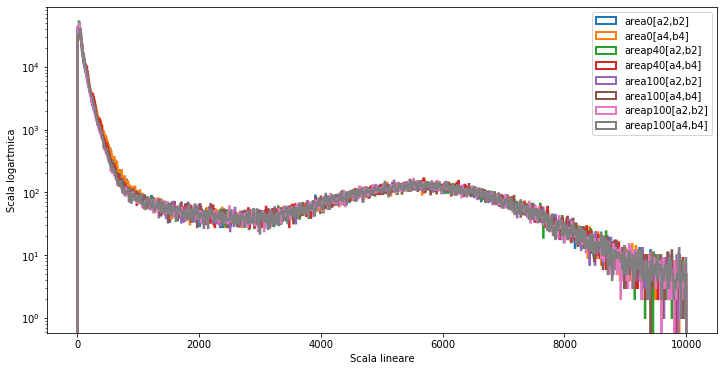

In [17]:
area_space = np.linspace(0,10000,1000)

plt.figure(figsize=(12,6))

plt.hist(data['area0_2'],bins=area_space,histtype='step',lw=2,density=False, label='area0[a2,b2]')
plt.hist(data['area0_4'],bins=area_space,histtype='step',lw=2,density=False, label='area0[a4,b4]')

plt.hist(data['areap40_2'],bins=area_space,histtype='step',lw=2,density=False, label='areap40[a2,b2]')
plt.hist(data['areap40_4'],bins=area_space,histtype='step',lw=2,density=False, label='areap40[a4,b4]')

plt.hist(data['area100_2'],bins=area_space,histtype='step',lw=2,density=False, label='area100[a2,b2]')
plt.hist(data['area100_4'],bins=area_space,histtype='step',lw=2,density=False, label='area100[a4,b4]')

plt.hist(data['areap100_2'],bins=area_space,histtype='step',lw=2,density=False, label='areap100[a2,b2]')
plt.hist(data['areap100_4'],bins=area_space,histtype='step',lw=2,density=False, label='areap100[a4,b4]')

plt.yscale("log")
plt.xlabel('Scala lineare')
plt.ylabel('Scala logartmica')
plt.legend()
plt.show